# Анализ латинской общественно-политической лексики, выражающей понятие «народ», от античности к Средним векам с помощью моделей эмбеддингов слов

Загружаем модели эмбеддингов слов с https://embeddings.lila-erc.eu



In [1]:
import gensim
from gensim.models import KeyedVectors

# Load word2vec models
model_1 = KeyedVectors.load_word2vec_format('https://embeddings.lila-erc.eu/samples/download/aligned/OperaLatina.vec.txt', binary=False)
model_2 = KeyedVectors.load_word2vec_format('https://embeddings.lila-erc.eu/samples/download/aligned/OperaMaiora.vec.txt', binary=False)


После загрузки моделей вы можете получить векторы слов для определенного слова в каждой модели, используя метод word_vec.

Чтобы сравнить значение слова в двух моделях, вы можете использовать меру подобия между векторами, например косинусное сходство. Вы можете использовать библиотеку sklearn для вычисления косинусного сходства между двумя векторами:

In [7]:
from sklearn.metrics.pairwise import cosine_similarity

words = ["gens", "populus", "natio", "uulgus", "genus", "stirps", "senator", "seruus", "plebs", "ciuis", "ciuitas", "turba", "patricius", "tumultus", "regnum", "lingua", "familia"]

#words = ["gens", "populus", "natio", "uulgus", "genus", "plebs", "ciuitas", "turba", "patricius", "regnum", "tumultus", "familia"]

#words = ["gens", "populus", "natio", "uulgus"]

for word in words:
    word_vec_1 = model_1.get_vector(word);
    word_vec_2 = model_2.get_vector(word);
    similarity = cosine_similarity([word_vec_1], [word_vec_2])[0][0];
    print(f"Similarity between {word} in classical and medieval era: {similarity}")

Similarity between gens in classical and medieval era: 0.1089944988489151
Similarity between populus in classical and medieval era: -0.14469315111637115
Similarity between natio in classical and medieval era: -0.013743181712925434
Similarity between uulgus in classical and medieval era: 0.018742652609944344
Similarity between genus in classical and medieval era: 0.10008859634399414
Similarity between stirps in classical and medieval era: -0.045451365411281586
Similarity between senator in classical and medieval era: 0.059887681156396866
Similarity between seruus in classical and medieval era: -0.13741081953048706
Similarity between plebs in classical and medieval era: -0.10358569771051407
Similarity between ciuis in classical and medieval era: -0.03489263728260994
Similarity between ciuitas in classical and medieval era: -0.19689291715621948
Similarity between turba in classical and medieval era: 0.04200400039553642
Similarity between patricius in classical and medieval era: -0.0107918

Результирующая оценка сходства будет иметь значение от 0 до 1, где значение 1 указывает, что слово имеет одинаковое значение в обеих моделях, а значение 0 указывает на то, что слово имеет совершенно разное значение в двух моделях.

Возможны ли отрицательные значения подобия косинусов? Технически сходство косинусов может быть отрицательным, хотя на практике это редкость. Косинусное сходство вычисляется как косинус угла между двумя векторами, а функция косинуса может принимать значения от -1 до 1. Однако при вычислении косинусного сходства оно обычно нормализуется, так что значения всегда находятся в диапазоне от 0 до 1. где 0 указывает, что векторы ортогональны (т. е. не похожи), а 1 указывает, что векторы идентичны.

Отрицательные значения косинусного подобия могут возникать, когда угол между векторами больше 90 градусов, но обычно это не интерпретируется как указание на сходство между векторами. Вместо этого отрицательные значения сходства косинусов обычно интерпретируются как указывающие на несходство или ортогональность между векторами.

In [8]:
# Compare the similarities between the words in each model
for word in words:
    classical_similarities = model_1.most_similar(word, topn=10)
    medieval_similarities = model_2.most_similar(word, topn=10)
    print("Similarities for", word, "in classical model:", classical_similarities)
    print("Similarities for", word, "in medieval model:", medieval_similarities)

Similarities for gens in classical model: [('regens', 0.613848865032196), ('scythae', 0.5793613195419312), ('natio', 0.5635300278663635), ('mardi', 0.5634660124778748), ('illyrii', 0.5383575558662415), ('iudaei', 0.5338515043258667), ('alienigena', 0.522540271282196), ('sarmatae', 0.5208836197853088), ('brigantes', 0.5183442831039429), ('perdomo', 0.517805278301239)]
Similarities for gens in medieval model: [('iudaicus', 0.569577693939209), ('gentilis', 0.5592577457427979), ('iudaeus', 0.5586758852005005), ('natio', 0.5583958625793457), ('primitiuus', 0.5581321120262146), ('gentilitas', 0.5195542573928833), ('disperdo', 0.5178202390670776), ('princeps', 0.517543375492096), ('alienigenus', 0.5008281469345093), ('lex', 0.5007472634315491)]
Similarities for populus in classical model: [('romanus', 0.560446560382843), ('ciuis', 0.5572011470794678), ('popularis', 0.5369052886962891), ('populatio', 0.534020721912384), ('populariter', 0.5179181694984436), ('populo', 0.5158695578575134), ('dec

# Визуализация

Есть несколько способов визуализировать слова из модели word2vec. Один простой способ сделать это — использовать библиотеку, такую как matplotlib или seaborn, для построения векторов слов в двумерном пространстве.

Для этого вам сначала нужно получить векторы слов для слов, которые вы хотите визуализировать. Вы можете использовать метод word_vec модели word2vec для извлечения векторов слов. Например:

In [11]:
import numpy as np


#words = ["familia", "genus", "stirps", "gens", "natio", "populus", "plebs", "ciuis", "ciuitas", "turba", "tumultus", "lingua", "patricius", "regnum", "uulgus"]

# Assume that "model" is a word2vec model and "words" is a list of words
word_vectors = np.array([model_1.get_vector(word) for word in words])


Затем вы можете использовать метод уменьшения размерности, такой как PCA (анализ главных компонентов) для проецирования векторов слов в двумерное пространство. Для этого вы можете использовать класс PCA из sklearn:

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
word_vectors_2d = pca.fit_transform(word_vectors)


Наконец, вы можете использовать библиотеку, например matplotlib или seaborn, для построения векторов слов в двумерном пространстве. Например:

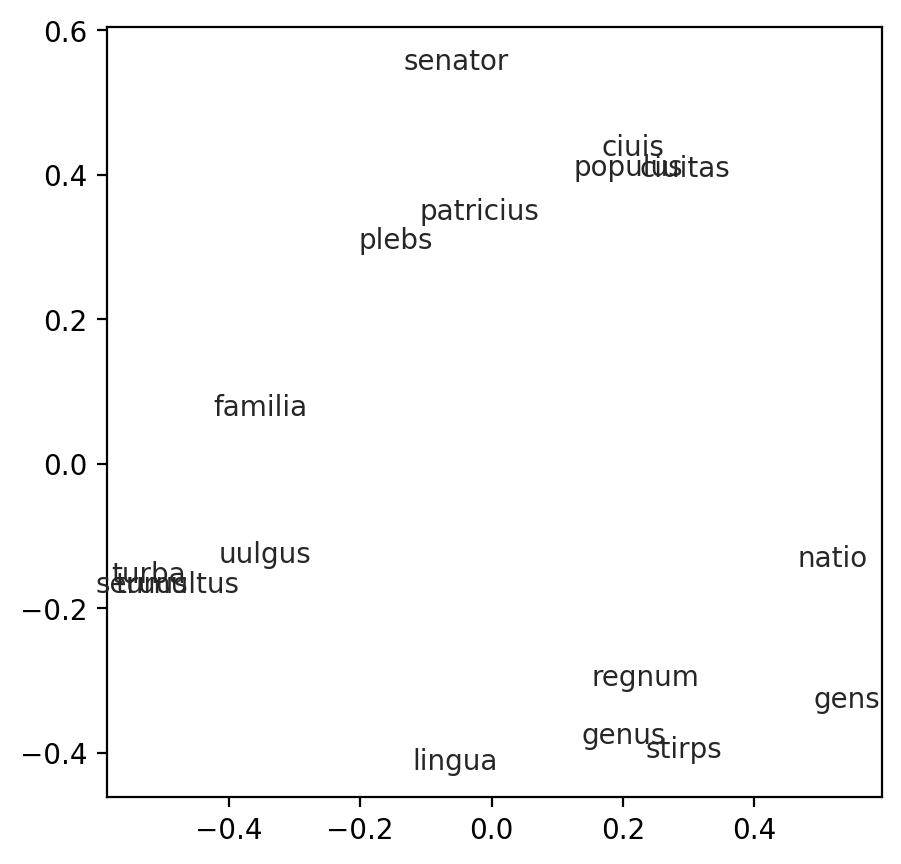

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a Figure object with the desired size
fig = plt.figure(dpi=200, figsize=(5, 5))

# Create the scatter plot using seaborn, passing the Figure object as the "figure" parameter
ax = sns.scatterplot(x=[vec[0] for vec in word_vectors_2d], y=[vec[1] for vec in word_vectors_2d],
                     figure=fig, s = 0)

# Turn off the axes
#ax.set_axis_off()

# Add the labels using matplotlib
with sns.axes_style("white"):
    for word, vec in zip(words, word_vectors_2d):
        plt.text(vec[0], vec[1], word, ha="center", va="center")

То же проделываем для второй модели

In [19]:
import numpy as np


#words = ["familia", "genus", "stirps", "gens", "natio", "populus", "plebs", "ciuis", "ciuitas", "turba", "tumultus", "lingua", "patricius", "regnum", "uulgus"]

# Assume that "model" is a word2vec model and "words" is a list of words
word_vectors = np.array([model_2.get_vector(word) for word in words])

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
word_vectors_2d = pca.fit_transform(word_vectors)

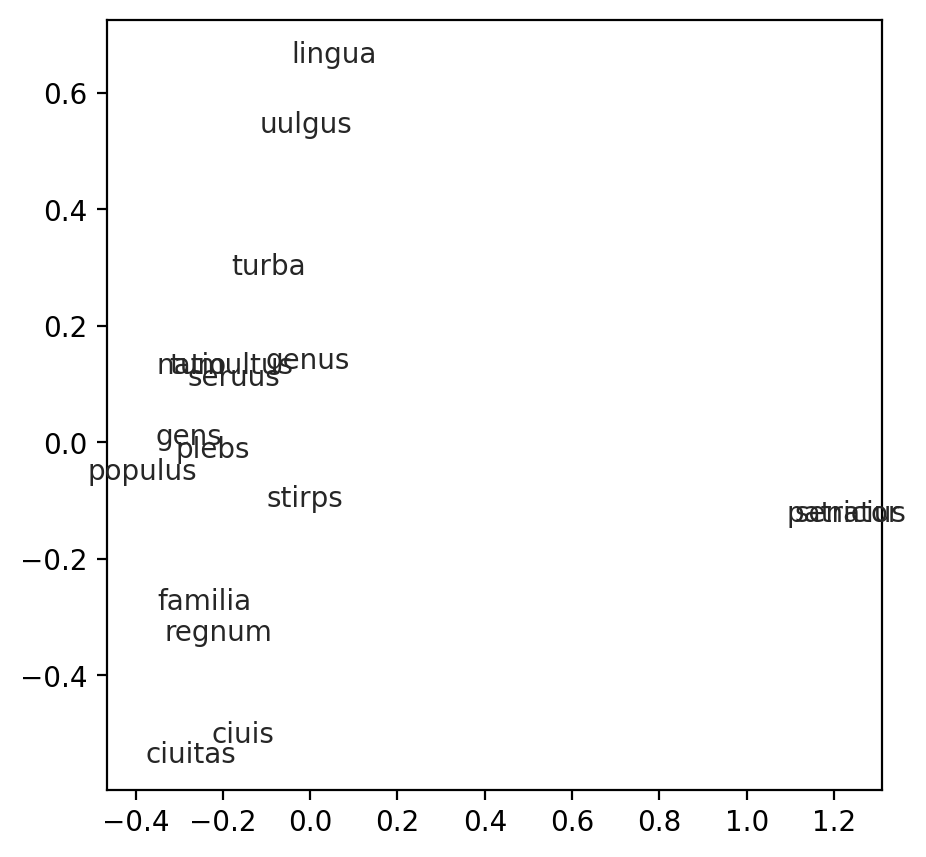

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a Figure object with the desired size
fig = plt.figure(dpi=200, figsize=(5, 5))

# Create the scatter plot using seaborn, passing the Figure object as the "figure" parameter
ax = sns.scatterplot(x=[vec[0] for vec in word_vectors_2d], y=[vec[1] for vec in word_vectors_2d],
                     figure=fig, s = 0)

# Turn off the axes
#ax.set_axis_off()

# Add the labels using matplotlib
with sns.axes_style("white"):
    for word, vec in zip(words, word_vectors_2d):
        plt.text(vec[0], vec[1], word, ha="center", va="center")